In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df1= pd.read_csv ("dataset1_clean.csv")
df3 = pd.read_csv ("merged_dataset.csv")

In [23]:
df3.head()

,date,hours_after_sunset,risk,reward,bat_landing_to_food,food_availability,rat_arrival_number,bat_landing_number
0,2017-12-30,2.0,1,0,16.000000,3.955857,0.0,20.0
1,2017-12-30,3.0,0,1,0.074016,3.067912,1.0,37.0
2,2017-12-30,3.0,0,1,4.000000,3.067912,1.0,37.0
3,2017-12-30,3.0,1,0,10.000000,3.067912,1.0,37.0
4,2017-12-30,3.0,1,0,15.000000,3.067912,1.0,37.0


In [24]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 800 non-null    object 
 1   hours_after_sunset   800 non-null    float64
 2   risk                 800 non-null    int64  
 3   reward               800 non-null    int64  
 4   bat_landing_to_food  800 non-null    float64
 5   food_availability    795 non-null    float64
 6   rat_arrival_number   795 non-null    float64
 7   bat_landing_number   795 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 50.1+ KB


In [25]:
df3.describe()

,hours_after_sunset,risk,reward,bat_landing_to_food,food_availability,rat_arrival_number,bat_landing_number
count,800.000000,800.000000,800.000000,800.000000,795.000000,795.000000,795.000000
mean,5.573125,0.511250,0.582500,7.972182,2.417533,1.529560,45.265409
std,2.397713,0.500186,0.493455,10.448266,0.794015,1.284501,23.496369
min,0.000000,0.000000,0.000000,0.010238,0.000000,0.000000,2.000000
25%,4.000000,0.000000,0.000000,1.000000,2.000000,1.000000,27.000000
50%,5.500000,1.000000,1.000000,4.000000,2.774194,1.000000,45.000000
75%,7.500000,1.000000,1.000000,10.000000,3.000000,2.000000,64.000000
max,12.000000,1.000000,1.000000,59.000000,4.000000,8.000000,103.000000


In [33]:
df3["habit"] = df1["habit"]

In [34]:
df3 = df3.merge(df1[["habit"]], left_index=True, right_index=True)


In [36]:
df3.columns


Index(['date', 'hours_after_sunset', 'risk', 'reward', 'bat_landing_to_food',
       'food_availability', 'rat_arrival_number', 'bat_landing_number',
       'habit_x', 'habit_y'],
      dtype='object')

In [38]:
(df3["habit_x"] == df3["habit_y"]).all()

np.True_

In [39]:
df3["habit"] = df3["habit_x"]
df3.drop(columns=["habit_x", "habit_y"], inplace=True)

In [40]:
print(df3.columns)


Index(['date', 'hours_after_sunset', 'risk', 'reward', 'bat_landing_to_food',
       'food_availability', 'rat_arrival_number', 'bat_landing_number',
       'habit'],
      dtype='object')


In [54]:
df3["rat_present"] = df3["rat_arrival_number"] > 0


In [87]:
# group descriptive analysis
grouped = df3.groupby("rat_present")[["risk", "reward", "bat_landing_to_food"]].describe()
grouped

risk                                              reward  \
             count      mean       std  min  25%  50%  75%  max  count   
rat_present                                                              
False        135.0  0.577778  0.495753  0.0  0.0  1.0  1.0  1.0  135.0   
True         665.0  0.497744  0.500371  0.0  0.0  0.0  1.0  1.0  665.0   

                       ...           bat_landing_to_food                       \
                 mean  ...  75%  max               count      mean        std   
rat_present            ...                                                      
False        0.518519  ...  1.0  1.0               135.0  9.517536  12.733573   
True         0.595489  ...  1.0  1.0               665.0  7.658463   9.902288   

                                             
                  min  25%  50%   75%   max  
rat_present                                  
False        0.013008  1.0  4.0  12.5  59.0  
True         0.010238  1.0  4.0  10.0  56.0  

[2 rows x 24 columns]

             count      mean        std       min  25%  50%   75%   max
rat_present                                                            
False        135.0  9.517536  12.733573  0.013008  1.0  4.0  12.5  59.0
True         665.0  7.658463   9.902288  0.010238  1.0  4.0  10.0  56.0


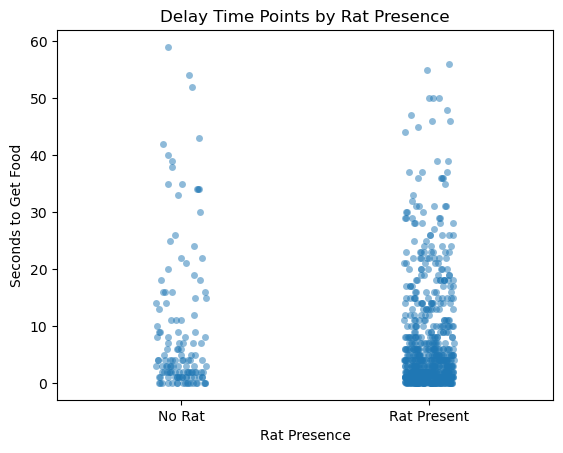

In [84]:
# descriptive analysis：Average delay time by rat persence
print(df3.groupby("rat_present")["bat_landing_to_food"].describe())

# Drawing：stripplot
sns.stripplot(data=df3, x="rat_present", y="bat_landing_to_food", jitter=True, alpha=0.5)
plt.title("Delay Time Points by Rat Presence")
plt.xticks([0, 1], ["No Rat", "Rat Present"])
plt.xlabel("Rat Presence")
plt.ylabel("Seconds to Get Food")
plt.show()

# The data suggests that bats tend to retrieve food faster in the presence of rats, which may indicate increased competition.

             count       mean        std  min   25%   50%   75%    max
rat_present                                                           
False        130.0  43.907692  21.397474  4.0  29.0  42.5  57.0   91.0
True         665.0  45.530827  23.891119  2.0  26.0  45.0  65.0  103.0


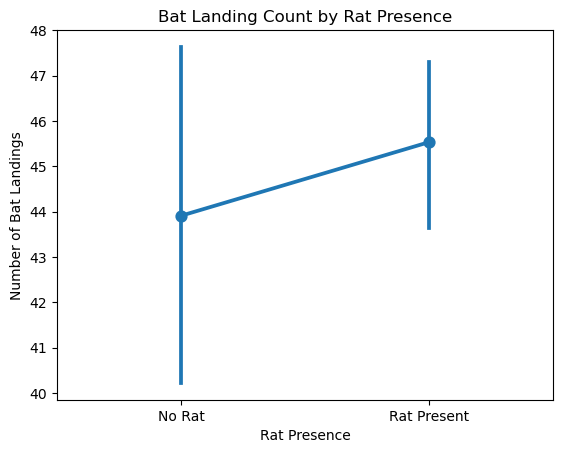

In [69]:
# descriptive analysis：Average landing count by rat persence
print(df3.groupby("rat_present")["bat_landing_number"].describe())

# Drawing：pointplot
sns.pointplot(data=df3, x="rat_present", y="bat_landing_number")
plt.title("Bat Landing Count by Rat Presence")
plt.xticks([0, 1], ["No Rat", "Rat Present"])
plt.xlabel("Rat Presence")
plt.ylabel("Number of Bat Landings")
plt.show()

# The presence of rats does not seem to reduce bat landing frequency, possibly indicating that bats do not perceive rats as a threat.

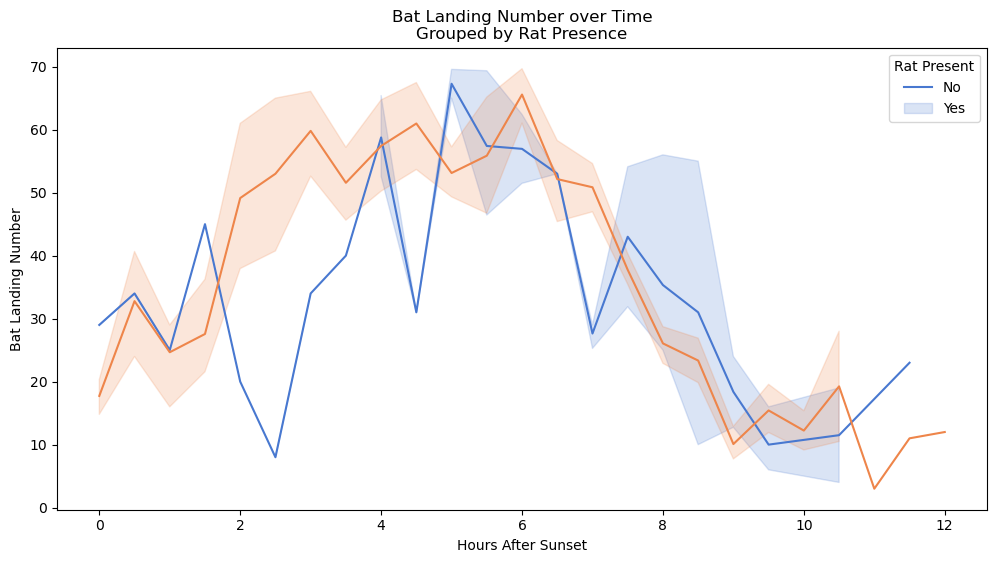

In [89]:
# Drawing : lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df3, x="hours_after_sunset", y="bat_landing_number", hue="rat_present", errorbar='ci', palette="muted")
plt.title("Bat Landing Number over Time\nGrouped by Rat Presence")
plt.xlabel("Hours After Sunset")
plt.ylabel("Bat Landing Number")
plt.legend(title="Rat Present", labels=["No", "Yes"])
plt.show()
# Bats tend to land more frequently during peak hours when rats are present, suggesting possible competitive interactions.

             count      mean       std  min  25%  50%  75%  max
rat_present                                                    
False        135.0  0.518519  0.501518  0.0  0.0  1.0  1.0  1.0
True         665.0  0.595489  0.491167  0.0  0.0  1.0  1.0  1.0


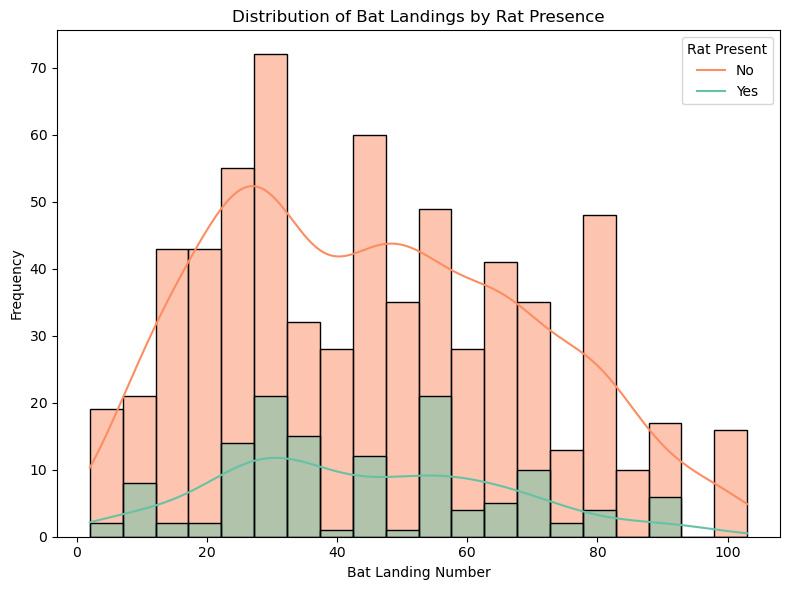

In [82]:
# descriptive analysis：distribution of bat landing by rat presence
print(df3.groupby("rat_present")["reward"].describe())

# Drawing：histplot
plt.figure(figsize=(8, 6))
sns.histplot(data=df3, x='bat_landing_number', hue='rat_present', bins=20, kde=True, palette='Set2')
plt.title("Distribution of Bat Landings by Rat Presence")
plt.xlabel("Bat Landing Number")
plt.ylabel("Frequency")
plt.legend(title='Rat Present', labels=["No", "Yes"])
plt.tight_layout()
plt.show()
# Bats tend to have a wider and more frequent landing distribution when rats are not present, suggesting that rat presence might slightly suppress bat activity.

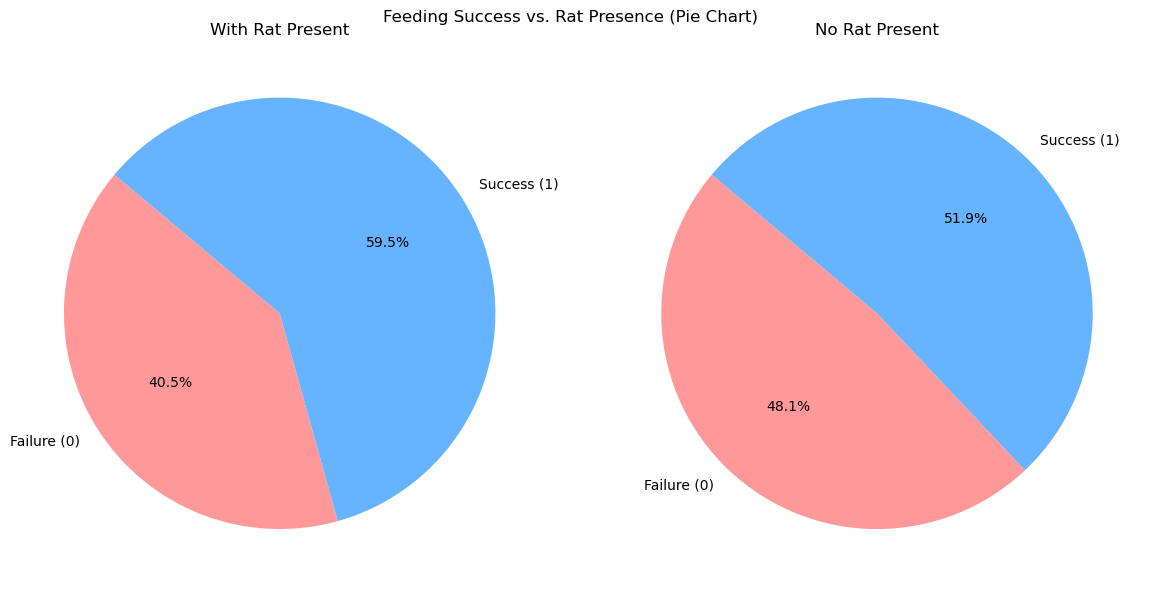

In [91]:
# Groupby rat_present ,check the distribution of reward（0：failure、1：Success）
rat_present_true = df3[df3['rat_present'] == True]['reward'].value_counts().sort_index()
rat_present_false = df3[df3['rat_present'] == False]['reward'].value_counts().sort_index()

# make sure all data have [0, 1] , or set them 0
for series in [rat_present_true, rat_present_false]:
    for i in [0, 1]:
        if i not in series:
            series[i] = 0
    series.sort_index(inplace=True)

# Drawing : pieplot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

labels = ['Failure (0)', 'Success (1)']
colors = ['#ff9999', '#66b3ff']

# Picture 1： Rat Present
axes[0].pie(rat_present_true, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
axes[0].set_title('With Rat Present')

# Picture 2： No Rat
axes[1].pie(rat_present_false, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
axes[1].set_title('No Rat Present')

plt.suptitle('Feeding Success vs. Rat Presence (Pie Chart)')
plt.tight_layout()
plt.show()